In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [6]:
import os
print("Current Dir:",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","Valid")


Current Dir: c:\Users\saibh\OneDrive\Documents\Potato_disease_project


In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred", #label values 0 1
    label_mode="categorical", 
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [8]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [10]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\saibh\jupyter\lab\workspaces\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 688ms/step - accuracy: 0.4060 - loss: 1.1451 - val_accuracy: 0.3400 - val_loss: 1.3992
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 638ms/step - accuracy: 0.5195 - loss: 0.9370 - val_accuracy: 0.7800 - val_loss: 0.5098
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 671ms/step - accuracy: 0.7952 - loss: 0.4682 - val_accuracy: 0.8067 - val_loss: 0.4587
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 725ms/step - accuracy: 0.8189 - loss: 0.4170 - val_accuracy: 0.9000 - val_loss: 0.2422
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 735ms/step - accuracy: 0.8709 - loss: 0.3190 - val_accuracy: 0.8233 - val_loss: 0.4114
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 760ms/step - accuracy: 0.9067 - loss: 0.2473 - val_accuracy: 0.9433 - val_loss: 0.1929
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 805ms/step - accuracy: 0.9534 - loss: 0.1395 - val_accuracy: 0.9100 - val_loss: 0.2638
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 815ms/step - accuracy: 0.9271 - loss: 0.1705 - val_accu

In [15]:
train_loss, train_acc=cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.9919 - loss: 0.0338
Training accuracy: 0.9944444298744202


In [16]:
val_loss, val_acc=cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9403 - loss: 0.1695
Validation accuracy: 0.9433333277702332


In [17]:
cnn.save('trained_plant_disease_model.keras')

In [18]:
training_history.history

{'accuracy': [0.46222221851348877,
  0.6144444346427917,
  0.7922222018241882,
  0.8500000238418579,
  0.8755555748939514,
  0.9088888764381409,
  0.9522222280502319,
  0.9422222375869751,
  0.9477777481079102,
  0.9644444584846497,
  0.9666666388511658,
  0.9677777886390686,
  0.9655555486679077,
  0.9800000190734863,
  0.9688888788223267],
 'loss': [1.0518748760223389,
  0.7706166505813599,
  0.46647629141807556,
  0.36896997690200806,
  0.3215150237083435,
  0.23335133492946625,
  0.1402229368686676,
  0.13568519055843353,
  0.14473383128643036,
  0.09591393172740936,
  0.08798854053020477,
  0.07708819955587387,
  0.09539864957332611,
  0.052878644317388535,
  0.0996997058391571],
 'val_accuracy': [0.3400000035762787,
  0.7799999713897705,
  0.8066666722297668,
  0.8999999761581421,
  0.8233333230018616,
  0.9433333277702332,
  0.9100000262260437,
  0.9399999976158142,
  0.8866666555404663,
  0.9266666769981384,
  0.9200000166893005,
  0.8533333539962769,
  0.9633333086967468,
  0.

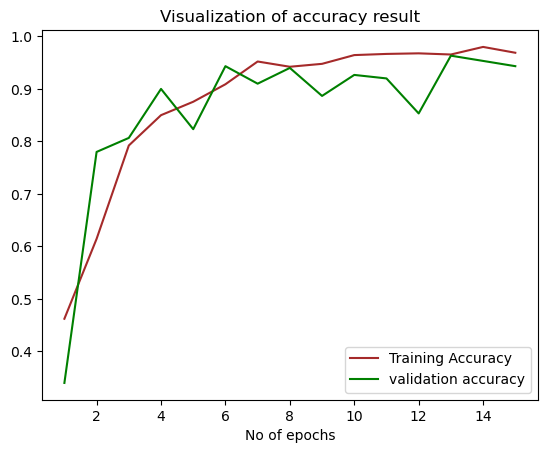

In [19]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='validation accuracy')
plt.xlabel("No of epochs")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()